Multivariate regression using linear regression model

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Check for NULL values

In [18]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [19]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [20]:
df["Species"]=df["Species"].astype('category')
df["Species"]=df["Species"].cat.codes
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


Drop Species because not required.


In [21]:
x=df.drop(['Weight','Species'],axis=1)
y=df['Weight']
print("x:",x)
print("y:",y)

x:      Length1  Length2  Length3   Height   Width
0       23.2     25.4     30.0  11.5200  4.0200
1       24.0     26.3     31.2  12.4800  4.3056
2       23.9     26.5     31.1  12.3778  4.6961
3       26.3     29.0     33.5  12.7300  4.4555
4       26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...     ...
154     11.5     12.2     13.4   2.0904  1.3936
155     11.7     12.4     13.5   2.4300  1.2690
156     12.1     13.0     13.8   2.2770  1.2558
157     13.2     14.3     15.2   2.8728  2.0672
158     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 5 columns]
y: 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


In [22]:
from sklearn import linear_model
pred=regr = linear_model.LinearRegression()
pred.fit(x,y)

LinearRegression()

Predict weight of Fish dependent on other features

In [23]:
predict=pred.predict(x)
from sklearn.metrics  import mean_squared_error
mse=mean_squared_error(y,predict)
print("MSE:",mse)
print("Intersept:",pred.intercept_)
print("Slope:",pred.coef_)

MSE: 14607.878944541946
Intersept: -499.586955356942
Slope: [ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


Text(0, 0.5, 'Predicted')

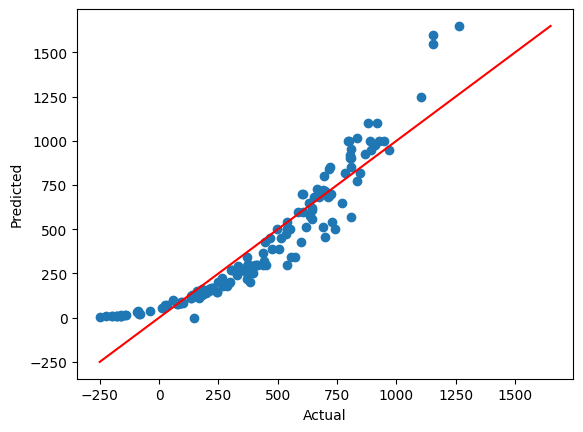

In [24]:
x_range=np.linspace(min(y.min(),predict.min()),max(y.max(),predict.max()),100)
y_range=x_range
plt.plot(x_range,y_range,color="red")
plt.scatter(predict,y)
plt.xlabel("Actual")
plt.ylabel("Predicted")

R2 score indicates accuracy of model.The near its to 1 the better.

In [25]:
from sklearn.metrics import r2_score
r2_score(y,predict)

0.8852867046546207